<a href="https://colab.research.google.com/github/alexjameswilliams/EDMDJTimbreTool/blob/main/Discogs_Scraper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install python3-discogs-client

In [ ]:
import discogs_client
import csv
import re
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Initialize Discogs client
d = discogs_client.Client('edm-dj-timbre-tool', user_token="yGnQdyMNEoqLbSeXbXobILziXWzBHrXMweBlehyt")

In [ ]:
# Function to extract tracklist information
def extract_tracklist(release):
    tracklist = release.tracklist
    track_info = ""
    for track in tracklist:
        track_info += f"{track.title} ({track.duration})\n"
    return track_info.strip()


In [ ]:
def load_discogs_ids_from_csv(file_path):
    discogs_ids = []
    with open(file_path, 'r', newline='', encoding='utf-8-sig') as csvfile:  # Using 'utf-8-sig' to handle BOM
        reader = csv.reader(csvfile)
        for row in reader:
            # Check if the row is not empty and the first column contains a value
            if row and row[1].strip():
                # Remove leading/trailing whitespace and convert the value to an integer
                discogs_id = int(row[1].strip())
                discogs_ids.append(discogs_id)
    return discogs_ids

In [ ]:
# Initialize Discogs client
d = discogs_client.Client() #ENTER OWN CREDENTIALS HERE

# Search for releases containing the word "Fabriclive"
results = d.search('Fabriclive', type='master')

# Initialize a list to store unique releases
unique_releases = []

# Loop through each release in the search results
for release in results:
    # If the master release is already in the list of unique releases, skip it
    if release in unique_releases:
        continue

    # Otherwise, add it to the list
    unique_releases.append(release)

# Function to extract the number from the title string
def extract_number(title):
    match = re.search(r'(\d+)', title)
    if match:
        return int(match.group())
    else:
        return float('inf')  # Return infinity if no number is found

# Sort unique releases based on the number in the title
unique_releases.sort(key=lambda x: extract_number(x.title))

# Open a CSV file for writing
with open('fabriclive_releases.csv', 'w', newline='', encoding='utf-8') as csvfile:
    # Create a CSV writer object
    writer = csv.writer(csvfile)

    # Write the header row
    writer.writerow(['Discogs ID', 'Title', 'Artists', 'Genres', 'Styles', 'Year', 'Tracklist'])

    # Loop through each unique release
    for release in unique_releases:
        # Get the release details
        release_details = d.master(release.id)

        # Extract relevant information
        discogs_id = release_details.id
        title = release_details.title
        artists = ', '.join(artist.name for artist in release_details.main_release.artists)
        genres = ', '.join(release_details.genres)
        styles = ', '.join(release_details.styles) if release_details.styles else ""
        year = release_details.year
        tracklist = extract_tracklist(release_details)

        # Write the row to the CSV file
        writer.writerow([discogs_id, title, artists, genres, styles, year, tracklist])

print("CSV file 'fabriclive_releases.csv' has been created successfully.")

CSV file 'fabriclive_releases.csv' has been created successfully.


In [ ]:
x = d.master(268442)
x.title
x.main_release.artists
x.genres
x.styles
x.year
extract_tracklist(x)


SyntaxError: invalid syntax (<ipython-input-15-b4519127ba65>, line 9)

A handful of mixes were not collected with the method above due to labelling inconsistency on discogs. Manually fetch these from their discogs master release ID.

In [ ]:
# List of missing Discogs IDs
#missing_ids = [2396014, 2895660, 3463660, 3731484, 4024399, 4729713, 6077028, 6999627]
#file_path = '/content/fabric_ids.csv'
#missing_ids = load_discogs_ids_from_csv(file_path)
missing_ids = [12705377]

# Open a CSV file for writing missing entries
with open('missing_entries.csv', 'w', newline='', encoding='utf-8') as csvfile:
    # Create a CSV writer object
    writer = csv.writer(csvfile)

    # Write the header row
    writer.writerow(['Discogs ID', 'Title', 'Artists', 'Genres', 'Styles', 'Year', 'Tracklist'])

    # Loop through each missing Discogs ID
    for discogs_id in missing_ids:
        try:
            # Get the release details (change betweeen master and release as necessary)
            release_details = d.release(discogs_id)
            #release_details = d.master(discogs_id)

            # Extract relevant information
            title = release_details.title
            artists = ', '.join(artist.name for artist in release_details.artists) # also needs changing if master or release
            genres = ', '.join(release_details.genres)
            styles = ', '.join(release_details.styles) if release_details.styles else ""
            year = release_details.year
            tracklist = extract_tracklist(release_details)

            # Write the row to the CSV file
            writer.writerow([discogs_id, title, artists, genres, styles, year, tracklist])
        except:
            print(f"Failed to fetch details for Discogs ID: {discogs_id}")

print("CSV file 'missing_entries.csv' has been created successfully.")

CSV file 'missing_entries.csv' has been created successfully.


Some additional post-processing of the CSV file is performed to tidy up titles, and remove irrelevant mixes such as promotional radio mixes and unofficial mixes.

In [ ]:
import discogs_client
import csv
import re

# Initialize Discogs client
d = discogs_client.Client('edm-dj-timbre-tool', user_token="yGnQdyMNEoqLbSeXbXobILziXWzBHrXMweBlehyt")

# List to store master releases
fabric_releases = []

# Loop through numbers from 1 to 100
for num in range(1, 101):
    # Construct search query for Fabric releases
    query = f'Fabric {num}'

    # Search for master releases with the given title
    results = d.search(query, type='master')

    # Append master releases to the list
    for result in results:
        fabric_releases.append(result)

# Function to extract the number from the title string
def extract_number(title):
    match = re.search(r'(\d+)', title)
    if match:
        return int(match.group())
    else:
        return float('inf')  # Return infinity if no number is found

# Sort fabric releases based on the number in the title
fabric_releases.sort(key=lambda x: extract_number(x.title))

# Open a CSV file for writing
with open('fabric_releases.csv', 'w', newline='', encoding='utf-8') as csvfile:
    # Create a CSV writer object
    writer = csv.writer(csvfile)

    # Write the header row
    writer.writerow(['Discogs ID', 'Title', 'Artists', 'Genres', 'Styles', 'Year', 'Tracklist'])

    # Loop through each fabric release
    for release in fabric_releases:
        # Get the release details
        release_details = d.master(release.id)

        # Extract relevant information
        discogs_id = release_details.id
        title = release_details.title
        artists = ', '.join(artist.name for artist in release_details.main_release.artists)
        genres = ', '.join(release_details.genres)
        styles = ', '.join(release_details.styles) if release_details.styles else ""
        year = release_details.year
        tracklist = extract_tracklist(release_details)

        # Write the row to the CSV file
        writer.writerow([discogs_id, title, artists, genres, styles, year, tracklist])

print("CSV file 'fabric_releases.csv' has been created successfully.")

KeyboardInterrupt: 

In [ ]:
#@title Mount Google Drive / Assign Directories
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Define the root directory name
root_dir = "/content/drive/MyDrive/edm-timbre-data"

# Function to recursively list all folders and files
def list_folders_files(directory, parent_path=""):
    folders_files = []
    for root, dirs, files in os.walk(directory):
        for name in dirs:
            # Append the relative folder path
            folders_files.append(os.path.relpath(os.path.join(root, name), directory))
    return [os.path.join(parent_path, folder) for folder in folders_files]

# List folders inside "fabric" and "fabriclive" directories
fabric_dir = os.path.join(root_dir, "fabric")
fabriclive_dir = os.path.join(root_dir, "fabriclive")

fabric_folders = list_folders_files(fabric_dir, "edm-timbre-tool/fabric")
fabriclive_folders = list_folders_files(fabriclive_dir, "edm-timbre-tool/fabriclive")

# Combine the lists of folders
all_folders = fabric_folders + fabriclive_folders

# Sort the folders alphabetically
all_folders.sort()

# Write the folder paths to a CSV file
csv_file = "/content/folder_paths.csv"
with open(csv_file, 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Folder Path'])
    for folder in all_folders:
        writer.writerow([folder])

print(f"CSV file '{csv_file}' has been created successfully.")

CSV file '/content/folder_paths.csv' has been created successfully.


In [ ]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
csv_file_path = "/content/fabriclive_mix_series_data.csv"  # Replace with the path to your CSV file
df = pd.read_csv(csv_file_path)

# Initialize genre and style counters
genre_counts = {}
style_counts = {}

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    # Split the genres and styles into separate items
    try:
      genres = row['Genres'].split(', ')
      styles = row['Styles'].split(', ')

      # Count the occurrences of each genre
      for genre in genres:
          if genre in genre_counts:
              genre_counts[genre] += 1
          else:
              genre_counts[genre] = 1

      # Count the occurrences of each style
      for style in styles:
          if style in style_counts:
              style_counts[style] += 1
          else:
              style_counts[style] = 1

    except:
      print("idk")
      print(index)

# Convert genre counts to a DataFrame
genre_df = pd.DataFrame(list(genre_counts.items()), columns=['Genre', 'Count'])

# Convert style counts to a DataFrame
style_df = pd.DataFrame(list(style_counts.items()), columns=['Style', 'Count'])

# Save genre counts to a CSV file
genre_csv_file = "genre_counts.csv"
genre_df.to_csv(genre_csv_file, index=False)

# Save style counts to a CSV file
style_csv_file = "style_counts.csv"
style_df.to_csv(style_csv_file, index=False)

print(f"Genre counts saved to '{genre_csv_file}'")
print(f"Style counts saved to '{style_csv_file}'")

idk
13
Genre counts saved to 'genre_counts.csv'
Style counts saved to 'style_counts.csv'


In [ ]:
import pandas as pd

# Load the style counts CSV file into a pandas DataFrame
style_csv_file1 = "/content/fabriclive_style_counts.csv"  # Replace with the path to your first style counts CSV file
style_csv_file2 = "/content/fabric_style_counts.csv"  # Replace with the path to your second style counts CSV file
style_df1 = pd.read_csv(style_csv_file1)
style_df2 = pd.read_csv(style_csv_file2)

# Merge the style counts DataFrames on the 'Style' column and sum the counts
combined_style_df = pd.merge(style_df1, style_df2, on='Style', how='outer', suffixes=('_1', '_2'))
combined_style_df['Count'] = combined_style_df['Count_1'].fillna(0) + combined_style_df['Count_2'].fillna(0)
combined_style_df.drop(['Count_1', 'Count_2'], axis=1, inplace=True)

# Save the combined style counts to a CSV file
combined_style_csv_file = "combined_style_counts.csv"
combined_style_df.to_csv(combined_style_csv_file, index=False)
print(f"Combined style counts saved to '{combined_style_csv_file}'")

Combined style counts saved to 'combined_style_counts.csv'


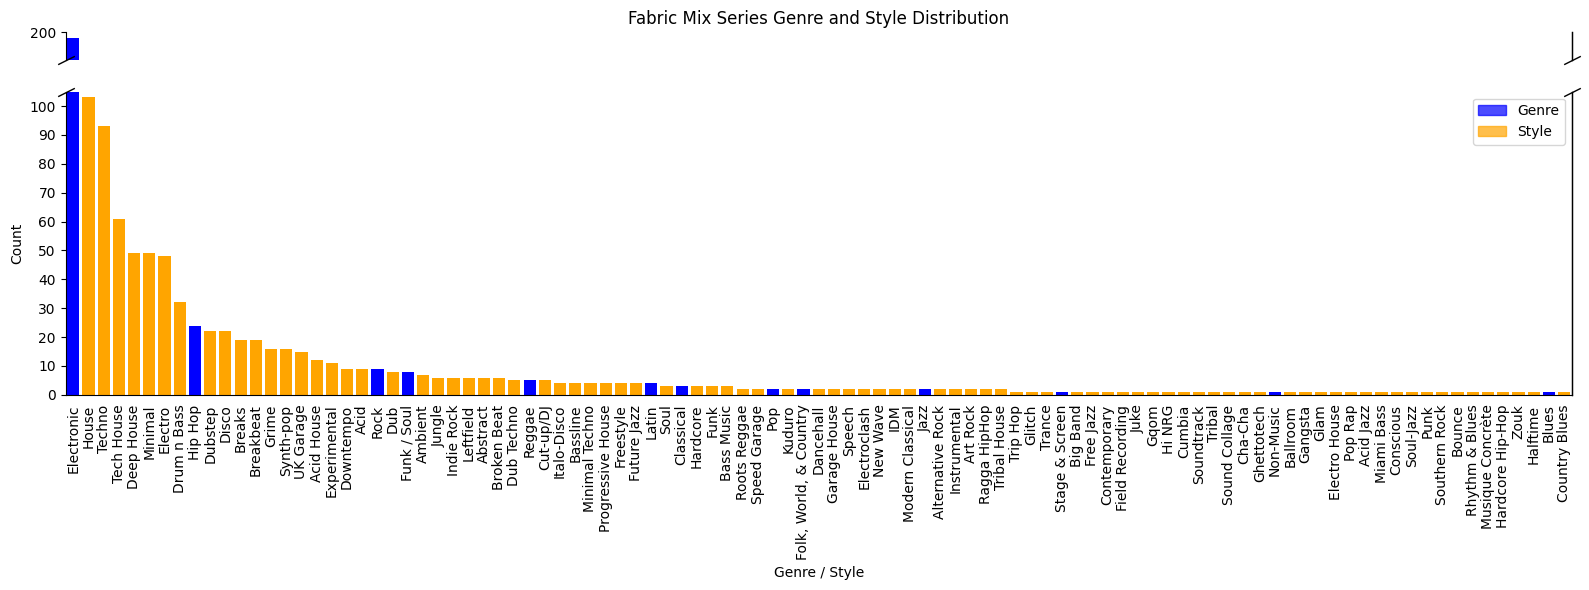

In [ ]:
#@title Plotting Figure

# Load the combined genre counts CSV file into a pandas DataFrame
combined_genre_csv_file = "combined_genre_counts.csv"  # Replace with the path to your combined genre counts CSV file
combined_genre_df = pd.read_csv(combined_genre_csv_file)

# Load the combined style counts CSV file into a pandas DataFrame
combined_style_csv_file = "combined_style_counts.csv"  # Replace with the path to your combined style counts CSV file
combined_style_df = pd.read_csv(combined_style_csv_file)

# Merge the genre and style DataFrames
merged_df = pd.merge(combined_genre_df, combined_style_df, left_on='Genre', right_on='Style', how='outer')

# Combine counts and fill NaN values with 0
merged_df['Count'] = merged_df['Count_x'].fillna(0) + merged_df['Count_y'].fillna(0)

# Sort the merged DataFrame by count in descending order
sorted_merged_df = merged_df.sort_values(by='Count', ascending=False)

# Generate colors for bars
colors = ['blue' if pd.notnull(genre) else 'orange' for genre in sorted_merged_df['Genre']]

# Create a figure with two subplots, swapping the order
fig, (ax2, ax1) = plt.subplots(2, 1, sharex=True, figsize=(16, 6), gridspec_kw={'height_ratios': [1, 11]})
fig.subplots_adjust(hspace=0.05)  # adjust space between axes

# Plot the interleaved bars on both subplots
bars = ax1.bar(np.arange(len(sorted_merged_df)), sorted_merged_df['Count'], color=colors)
ax2.bar(np.arange(len(sorted_merged_df)), sorted_merged_df['Count'], color=colors)

# Set x-axis ticks and labels
ax1.set_xticks(np.arange(len(sorted_merged_df)))
ax1.set_xticklabels(sorted_merged_df['Genre'].fillna(sorted_merged_df['Style']), rotation=90)

# Set y-axis limits for the first subplot
ax1.set_ylim(0, 105)

# Set y-axis limits for the second subplot
ax2.set_ylim(195, 200)

# Set y-axis tick spacing to every 10
ax1.yaxis.set_major_locator(MultipleLocator(10))
ax2.yaxis.set_major_locator(MultipleLocator(10))

# Hide the spines between ax1 and ax2
ax2.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Remove the tick lines at the bottom of the top plot
ax1.tick_params(axis='both', bottom=False)

# Hide tick lines at the top of the bottom plot
ax2.tick_params(axis='x', which='both', bottom=False)

# Draw broken y-axis lines
d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12, linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([1, 0], [1, 1], transform=ax1.transAxes, **kwargs)
ax2.plot([1, 0], [0, 0], transform=ax2.transAxes, **kwargs)

# Add a vertical line connecting the broken y-axis
ax1.plot([1, 1], [0, 1], transform=ax1.transAxes, color='black', linewidth=1, clip_on=False)
ax2.plot([1, 1], [0, 1], transform=ax2.transAxes, color='black', linewidth=1, clip_on=False)

# Add legend for coloring of genre and style
ax1.legend(handles=[plt.Rectangle((0,0),1,1,color='blue', alpha=0.7),
                    plt.Rectangle((0,0),1,1,color='orange', alpha=0.7)],
           labels=['Genre', 'Style'], loc='upper right')

plt.xlim(-0.5, len(sorted_merged_df) - 0.5)

# Add labels and title
ax1.set_xlabel('Genre / Style')
ax1.set_ylabel('Count')
ax2.set_title("Fabric Mix Series Genre and Style Distribution")

# Show plot
plt.tight_layout()
plt.show()



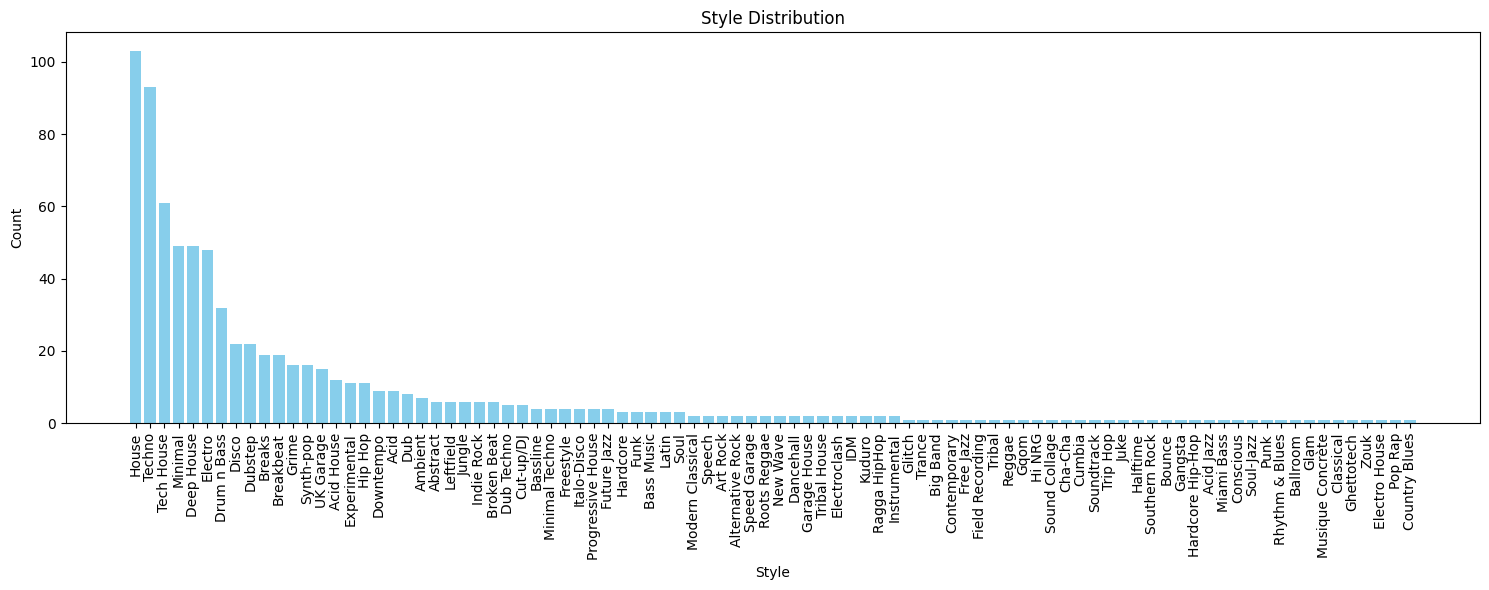

In [ ]:
# Load the combined genre counts CSV file into a pandas DataFrame
combined_genre_csv_file = "combined_style_counts.csv"  # Replace with the path to your combined genre counts CSV file
combined_genre_df = pd.read_csv(combined_genre_csv_file)

# Sort the DataFrame by the 'Count' column in descending order
combined_genre_df.sort_values(by='Count', ascending=False, inplace=True)

# Plot a bar graph
plt.figure(figsize=(15, 6))
plt.bar(combined_genre_df['Style'], combined_genre_df['Count'], color='skyblue')
plt.xlabel('Style')
plt.ylabel('Count')
plt.title('Style Distribution')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()